### Import of the libraries 

In [1]:
# Pandas for data processing 
import pandas as pd

# Library for numpy
import numpy as np
from numpy import random

# Library to get countries codes
import pycountry

# Regex for string values
import re

# Library to read zip file
import zipfile

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading of the dataset and early cleaning

In [2]:
#erasmus_df = pd.read_csv("Erasmus_mobility_statistics_2014_2019.csv",sep=',',low_memory=False)
zf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))
pd.set_option('display.max_columns', None)

erasmus_df=erasmus_df.dropna()
erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

erasmus_df

c:\Users\theoj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,42,AT,Wels,BRG Wels Wallererstraße,ES,Malaga,Escuela de Idiomas Nerja,1.0
1,2014-2015,2014-07,2014-08,7.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,25,AT,Wels,BRG Wels Wallererstraße,UK,Canterbury,Pilgrims LTD,1.0
2,2014-2015,2014-07,2014-08,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,51,AT,Wels,BRG Wels Wallererstraße,UK,London,St. Giles International,1.0
3,2014-2015,2014-08,2014-08,12.0,Staff training abroad,Language acquisition,CZ,??? - ? Unknown ?,Female,Staff,No,No,No,34,AT,Wels,BRG Wels Wallererstraße,UK,London,EF Language Center,1.0
4,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,No,53,AT,Schwarzach,Volksschule Schwarzach,IE,Dublin,Centre of English Studies,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462263,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,24,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462264,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,32,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462265,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,No,37,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462266,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Male,Staff,No,No,No,41,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0


### Cleaning and dropping columns

In [3]:
def drop_ages(x):
    if int(x) > 70 or int(x) < 10:
        return np.nan
    else:
        return x

In [4]:
#Delete the staff an teaching to focus on students
erasmus_df = erasmus_df[erasmus_df['Participant Profile']!='Staff']

#Cleaning the columns
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)
erasmus_df=erasmus_df.dropna()

erasmus_df = erasmus_df[erasmus_df['Mobility Duration']<=500]

erasmus_df = erasmus_df[erasmus_df['Participant Nationality'] != '-']

erasmus_df['Field of Education'] = erasmus_df['Field of Education'].replace("? Unknown ?","Other")

erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("? Unknown ?","Unknown")
erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("??? - ? Unknown ?","Unknown")

#Datatype changes
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].astype('int')
erasmus_df['Mobility Duration'] = erasmus_df['Mobility Duration'].astype('int')
erasmus_df['Participants'] = erasmus_df['Participants'].astype('int')

<ipython-input-4-c2696e040407>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)


In [5]:
print("There are  {}  exchange students in our Dataset".format(len(erasmus_df))) 
print("There are {} features (columns) in our dataset".format(len(erasmus_df.columns)))

There are  2662070  exchange students in our Dataset
There are 21 features (columns) in our dataset


## Data Analysis

In [6]:
#erasmus_df.groupby('Mobility Duration').count().plot(y='Academic Year',kind='bar',figsize=(15,8),title='Days of exchange')

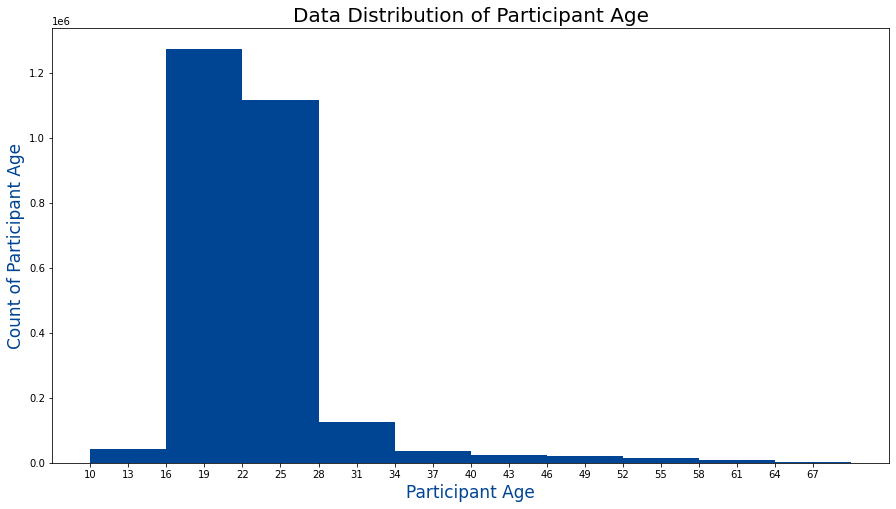

In [7]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Participant Age'],color="#004494")

axs.set_title("Data Distribution of Participant Age", fontsize=20)
axs.set_xticks([i for i in range(10,70,3)])
axs.set_xlabel("Participant Age", color="#004494", fontsize=17)
axs.set_ylabel("Count of Participant Age", color="#004494", fontsize=17)

plt.show()

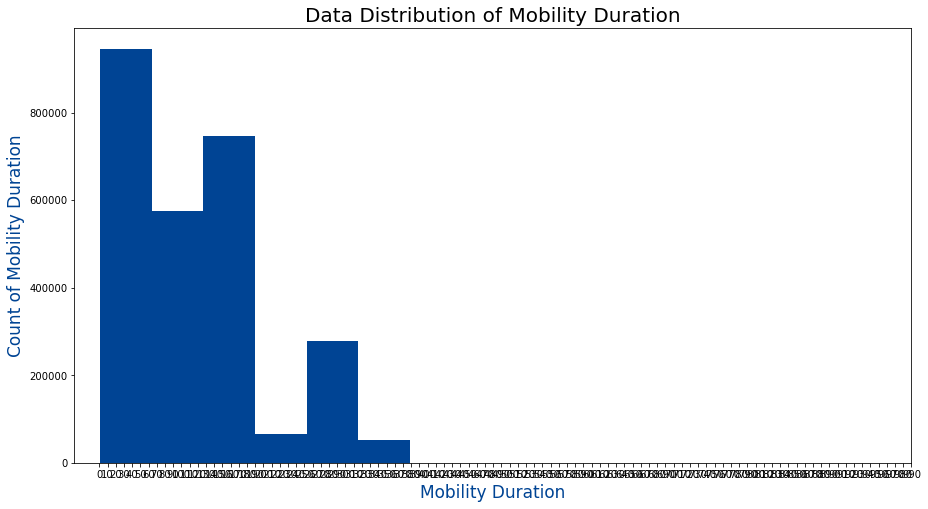

In [8]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Mobility Duration'],color="#004494")

axs.set_title("Data Distribution of Mobility Duration", fontsize=20)
axs.set_xticks([i for i in range(0,420,10)])
axs.set_xlabel("Mobility Duration", color="#004494", fontsize=17)
axs.set_ylabel("Count of Mobility Duration", color="#004494", fontsize=17)

plt.show()

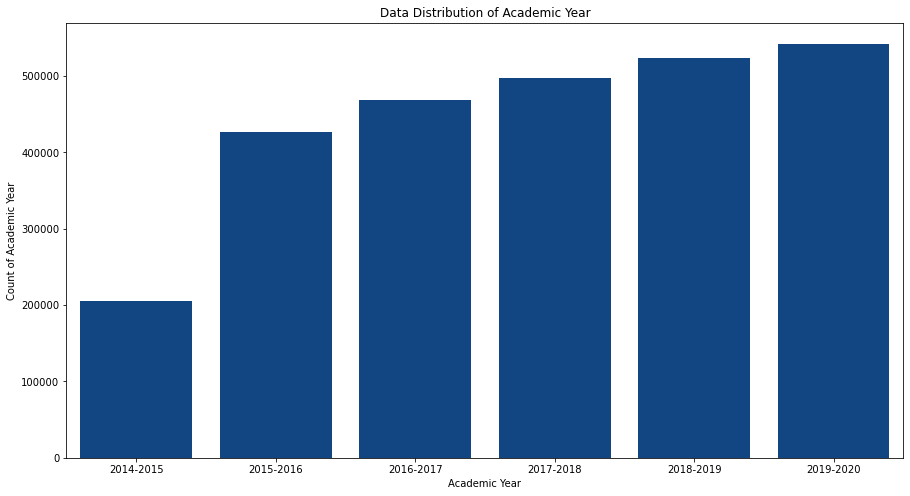

In [9]:
# Set-up the size and plots 
plt.figure(figsize=(15,8))

gfg = sns.countplot(x = "Academic Year", data=erasmus_df, color="#004494")
gfg.set(xlabel ="Academic Year", 
        ylabel = "Count of Academic Year", 
        title ='Data Distribution of Academic Year')

plt.show()

In [10]:
mean_ages_from_activity = erasmus_df[['Participant Age','Activity (mob)']].dropna()
mean_ages_from_activity['Participant Age'] = mean_ages_from_activity['Participant Age'].astype('int')
mean_ages_from_activity = round(mean_ages_from_activity.groupby('Activity (mob)').mean())

mean_ages_from_activity

,Participant Age
Activity (mob),
Advance Planning Visit,30.0
Advance Planning Visit - EVS,29.0
Advance Planning Visit - Erasmus- PRO,46.0
Advance Planning Visit – EVS,30.0
Advance Planning Visit – Youth Exchange,29.0
ErasmusPro - Mobility of VET learners (3 to 12 months),21.0
European Voluntary Service - Partner Countries,24.0
European Voluntary Service - Programme Countries,23.0
Group Volunteering Activities,23.0


In [11]:
erasmus_df.groupby('Participant Nationality').count().sort_values(by='Academic Year',ascending=False).head().Participants

Participant Nationality
DE    321572
FR    321030
ES    280083
IT    271013
TR    136507
Name: Participants, dtype: int64

In [12]:
erasmus_df.groupby('Sending Country Code').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending Country Code
FR    332016
DE    326163
ES    286320
IT    273530
TR    137250
Name: Participants, dtype: int64

In [13]:
erasmus_df.groupby('Receiving Country Code').count().sort_values(by='Academic Year',ascending=False).head().Participants

Receiving Country Code
ES    368757
DE    261891
UK    243141
IT    224837
FR    203181
Name: Participants, dtype: int64

In [14]:
erasmus_df.groupby('Receiving City').count().sort_values(by='Academic Year',ascending=False).head().Participants

Receiving City
London       35110
Barcelona    26928
Berlin       24727
Madrid       21315
Paris        21128
Name: Participants, dtype: int64

In [15]:
erasmus_df.groupby('Sending City').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending City
Budapest    21238
MADRID      20615
MILANO      19663
VALENCIA    18771
Paris       18530
Name: Participants, dtype: int64

In [16]:
erasmus_df.groupby('Receiving Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants

Receiving Organization
UNIVERSITAT DE VALENCIA                         11732
ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA    11685
UNIVERSIDAD DE GRANADA                          10826
UNIVERSIDADE DE LISBOA                          10742
UNIVERSIDAD COMPLUTENSE DE MADRID                9603
Name: Participants, dtype: int64

In [17]:
erasmus_df.groupby('Sending Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending Organization
ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA    14744
UNIVERSIDAD DE GRANADA                          11599
UNIVERSITA DEGLI STUDI DI PADOVA                 9960
UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA       9453
UNIVERSIDAD COMPLUTENSE DE MADRID                9375
Name: Participants, dtype: int64

In [18]:
sending = erasmus_df['Sending Country Code'].value_counts().to_frame().reset_index()
receiving = erasmus_df['Receiving Country Code'].value_counts().to_frame().reset_index()

sending_receiving = sending.merge(receiving)
sending_receiving = sending_receiving.rename(columns = {"index":"Country",
                                                        "Sending Country Code":"Sending Amount",
                                                        "Receiving Country Code":"Receiving Amount"})
# Get only the bigest 10 country
sending_receiving = sending_receiving.head(10)

sending_receiving = sending_receiving.set_index('Country')
sending_receiving

,Sending Amount,Receiving Amount
Country,,
FR,332016,203181
DE,326163,261891
ES,286320,368757
IT,273530,224837
TR,137250,60850
PL,134010,139602
UK,123341,243141
NL,105044,91496
RO,78117,52915


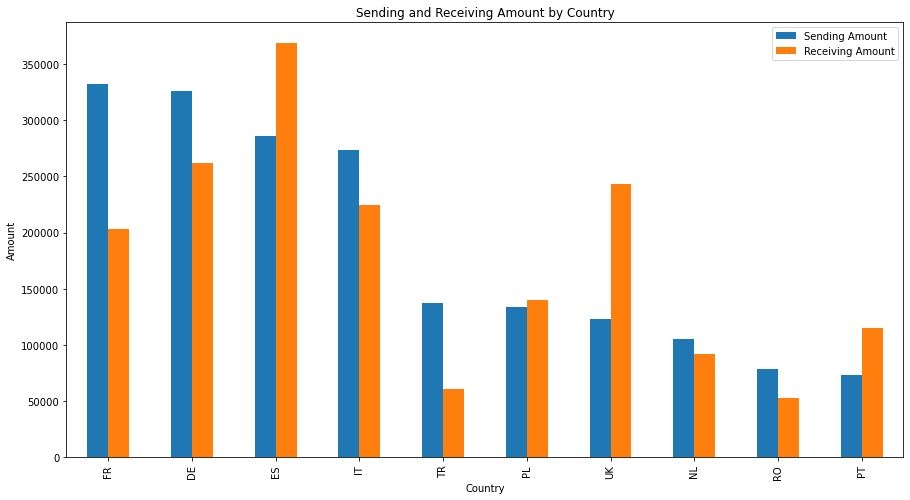

In [19]:
ax = sending_receiving.plot(kind='bar', figsize=(15, 8), rot=0)
ax.set_title('Sending and Receiving Amount by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

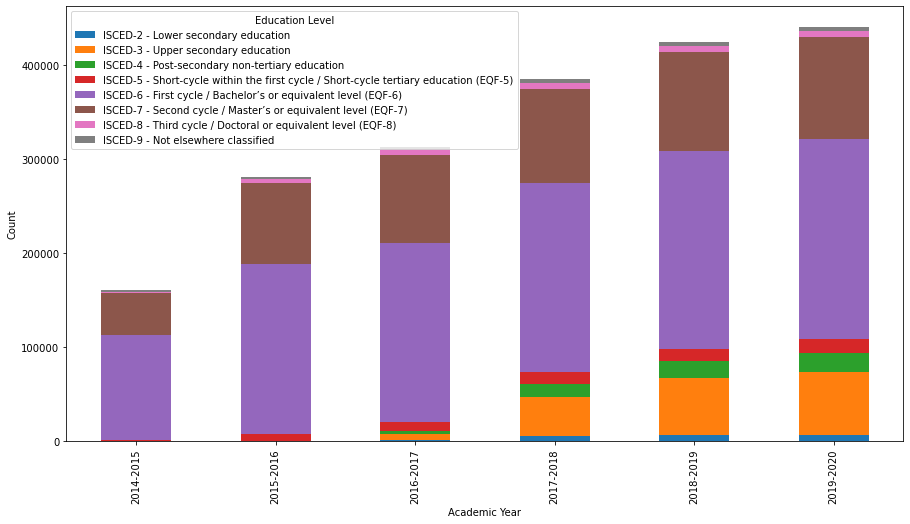

In [20]:
# group the dataframe by year and activity
grouped = erasmus_df[['Academic Year','Education Level']]
grouped = grouped[grouped['Education Level']!='Unknown']
grouped = grouped.groupby(['Academic Year', 'Education Level']).size().unstack(fill_value=0)

# create a stacked bar chart
fig, axs = plt.subplots(figsize=(15, 8))

grouped.plot(kind='bar', stacked=True, ax = axs)

# set the x-label and y-label
axs.set_xlabel('Academic Year')
axs.set_ylabel('Count')

# display the plot
plt.show()
grouped = None

Text(0.5, 1.0, 'Special Needs %')

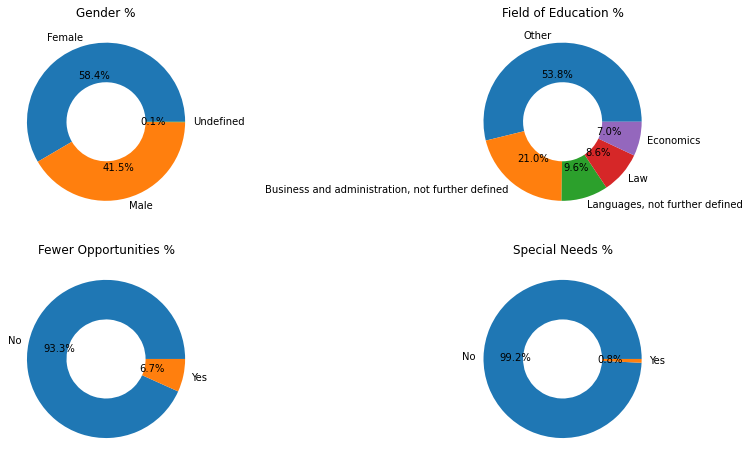

In [23]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches([15, 8])

# Gender 
gender = erasmus_df['Participant Gender'].value_counts()
axs[0, 0].pie(gender.values,
              labels = gender.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0, 0].set_title('Gender %')

# Field of education
FieldofEducation = erasmus_df['Field of Education'].value_counts().head(5)
axs[0,1].pie(FieldofEducation.values,
              labels = FieldofEducation.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0,1].set_title('Field of Education %')

# Fewer Opportunities
FewerOpportunities = erasmus_df['Fewer Opportunities'].value_counts()
axs[1,0].pie(FewerOpportunities.values,
              labels = FewerOpportunities.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1,0].set_title('Fewer Opportunities %')

# Special Needs
SpecialNeeds = erasmus_df['Special Needs'].value_counts()
axs[1, 1].pie(SpecialNeeds.values,
              labels = SpecialNeeds.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1, 1].set_title('Special Needs %')

### Cost of living

In [43]:
zf = zipfile.ZipFile('CostOfLiving.zip') 
cof = pd.read_csv(zf.open('cost-of-living.csv'))
pd.set_option('display.max_columns', None)

listToKeep = ['city','country','x1','x3','x25','x6','x27','x28','x29','x31','x36','x37','x38','x41','x44','x48','x54']
cof = cof[listToKeep]
# Drop the cities with no rent
cof = cof[cof['x48'].isna()==False]
#cof=cof.dropna()
#erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

cof

,city,country,x1,x3,x25,x6,x27,x28,x29,x31,x36,x37,x38,x41,x44,x48,x54
0,Seoul,South Korea,7.68,6.15,2.12,3.93,3.46,1.00,42.25,0.92,182.13,0.16,22.48,9.60,58.26,742.54,2689.62
1,Shanghai,China,5.69,5.69,0.94,3.98,3.56,0.57,28.47,0.43,66.00,0.03,17.07,8.54,70.49,1091.93,1419.87
2,Guangzhou,China,4.13,4.98,0.95,3.54,3.70,0.36,28.47,0.37,59.65,0.02,16.66,8.54,63.43,533.28,1211.68
3,Mumbai,India,3.68,3.68,2.27,2.48,4.30,0.25,4.91,0.31,43.57,0.01,9.33,4.30,32.77,522.40,640.81
4,Delhi,India,4.91,4.30,1.54,1.77,4.30,0.49,11.67,0.22,58.07,0.01,7.95,4.91,32.12,229.84,586.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,Broome,Australia,16.99,8.83,5.66,3.40,23.50,3.74,NaN,2.72,202.17,NaN,50.97,12.40,57.76,815.50,NaN
4945,Tirupati,India,2.46,4.30,1.91,1.47,3.99,0.21,12.28,0.37,24.93,0.01,10.75,3.07,30.92,82.90,614.09
4947,Rockhampton,Australia,14.95,8.15,3.51,3.40,25.82,2.29,91.74,0.83,106.86,0.20,42.47,11.55,94.01,781.58,3481.06
4950,Egilsstadhir,Iceland,17.01,8.50,4.25,3.90,9.92,3.19,53.15,1.06,129.93,0.25,56.70,5.32,119.30,637.85,2480.51


In [44]:
tempDf = cof[['city','x3']]
tempDf.sort_values(by='x3',ascending=False)

,city,x3
557,Pago Pago,22.13
517,Malabo,20.08
4808,Aigle,19.23
3966,Eilat,18.50
552,Torshavn,18.43
...,...,...
4807,Williams Lake,NaN
4818,Lachen,NaN
4828,Rudesheim am Rhein,NaN
4852,Birch Bay,NaN


### University rankings

In [ ]:
zf = zipfile.ZipFile('UniRanking.zip') 
rank2019 = pd.read_csv(zf.open('2019_rankings.csv'))
pd.set_option('display.max_columns', None)

#erasmus_df=erasmus_df.dropna()
#erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

rank2019